# Analysis of Thiruvananthapuram Suburbs

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [2]:
# The code was removed by Watson Studio for sharing.

,Address,Latitude,Longitude
0,Aakkulam,8.516299,76.892079
1,Ambalathara,8.451039,76.949729
2,Attakulangara,8.479351,76.947455
3,Attukal,8.470857,76.952724
4,Beemapally,8.456439,76.934490


In [3]:
CLIENT_ID = 'TUUNZWRTEIFAWLUINZSQYU0J1EEYS12ROSXAVEGSWNWECO5I' # your Foursquare ID
CLIENT_SECRET = 'JRGYNDNUC0UDJTDYC5AW5KRU3TUVJK10BOTVVBAX3WP1APF5' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: TUUNZWRTEIFAWLUINZSQYU0J1EEYS12ROSXAVEGSWNWECO5I
CLIENT_SECRET:JRGYNDNUC0UDJTDYC5AW5KRU3TUVJK10BOTVVBAX3WP1APF5


In [4]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [5]:
df_TVM=df_data_0

In [6]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius

In [7]:
TVM_venues = getNearbyVenues(names=df_TVM['Address'],
                                   latitudes=df_TVM['Latitude'],
                                   longitudes=df_TVM['Longitude']
                                  )

Aakkulam
Ambalathara
Attakulangara
Attukal
Beemapally
Chala
Chengallur
Connemara Market
East Fort
Jyothi Nagar
Kaithamukku
Kamaleswaram
Kaniyapuram
Kannammoola
Karamana
Kariavattom
Kazhakoottam
Kesavadasapuram
Konchiravila
Kowdiar
Manacaud
Mannanthala
Nalanchira
Nemom
Ooruttambalam
Palayam
Palkulangara
Pangappara
Pappanamcode
Pattom
Peroorkada
Perunthanni
Pettah
Peyad
Pongumoodu
Poojappura
Poonthura
Pothencode
Sasthamangalam
Sreekaryam
Thampanoor
Thirumala
Thonnakkal
Thumba
Ulloor
Valiyavila
Vanchiyoor
Vattiyoorkavu
Vazhayila
Vazhuthacaud
Vellayambalam
Vellayani
Vettucaud


In [8]:
print(TVM_venues.shape)
TVM_venues.head()

(796, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aakkulam,8.516299,76.892079,Veli Tourist Village,8.509979,76.889980,Arcade
1,Aakkulam,8.516299,76.892079,Veli Boat Club,8.510758,76.890125,Harbor / Marina
2,Aakkulam,8.516299,76.892079,Kerala Hotel,8.516252,76.898346,Seafood Restaurant
3,Aakkulam,8.516299,76.892079,The Kappi Shop,8.523280,76.891558,Tea Room
4,Aakkulam,8.516299,76.892079,Kochuveli Railway Station,8.510030,76.897409,Train Station


Let's check how many venues were returned for each neighborhood

In [9]:
TVM_Count = TVM_venues.groupby('Neighborhood').count().sort_values('Neighborhood Latitude', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

Let's find out how many unique categories can be curated from all the returned venues¶

In [10]:
print('There are {} uniques categories.'.format(len(TVM_venues['Venue Category'].unique())))

There are 110 uniques categories.


## Analyze Each Suburb

In [11]:
# one hot encoding
TVM_onehot = pd.get_dummies(TVM_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
TVM_onehot['Neighborhood'] = TVM_venues['Neighborhood'] 
#TVM_onehot['Latitude'] = TVM_venues['Neighborhood Latitude'] 
#TVM_onehot['Longitude'] = TVM_venues['Neighborhood Longitude'] 

# move neighborhood column to the first column
fixed_columns = [TVM_onehot.columns[-1]] + list(TVM_onehot.columns[:-1])
TVM_onehot = TVM_onehot[fixed_columns]

TVM_onehot.head()

,Zoo,ATM,Accessories Store,Airport,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,...,Student Center,Supermarket,Tea Room,Temple,Tennis Stadium,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Women's Store
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [12]:
TVM_grouped = TVM_onehot.groupby('Neighborhood').mean().reset_index()
TVM_grouped

,Neighborhood,Zoo,ATM,Accessories Store,Airport,Airport Terminal,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,...,Student Center,Supermarket,Tea Room,Temple,Tennis Stadium,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Warehouse Store,Women's Store
0,Aakkulam,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,...,0.000000,0.0,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.00
1,Ambalathara,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
2,Attakulangara,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.052632,0.000000,0.000000,0.000000,0.157895,0.000000,0.00
3,Attukal,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
4,Beemapally,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
5,Chala,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.023256,...,0.000000,0.0,0.000000,0.023256,0.000000,0.000000,0.023256,0.093023,0.000000,0.00
6,Chengallur,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00
7,Connemara Market,0.021739,0.000,0.021739,0.000000,0.000000,0.000000,0.021739,0.021739,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.00
8,East Fort,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.023810,...,0.000000,0.0,0.000000,0.023810,0.000000,0.000000,0.000000,0.095238,0.000000,0.00
9,Jyothi Nagar,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.00


Let's print each neighborhood along with the top 5 most common venues

In [ ]:
num_top_venues = 5

for hood in TVM_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = TVM_grouped[TVM_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aakkulam----
                venue  freq
0     Harbor / Marina   0.2
1       Train Station   0.2
2              Arcade   0.2
3            Tea Room   0.2
4  Seafood Restaurant   0.2


----Ambalathara----
                       venue  freq
0                 Restaurant  0.50
1          Food & Drink Shop  0.25
2                     Bakery  0.25
3                        Zoo  0.00
4  Middle Eastern Restaurant  0.00


----Attakulangara----
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.16
1              Indian Restaurant  0.16
2                  Shopping Mall  0.16
3                 Clothing Store  0.11
4                    Snack Place  0.05


----Attukal----
                   venue  freq
0                 Bakery   1.0
1                    Zoo   0.0
2               Pharmacy   0.0
3  Performing Arts Venue   0.0
4                   Park   0.0


----Beemapally----
                       venue  freq
0          Electronics Store  0.50
1          Recreation Center  

Let's put that into a pandas dataframe

In [14]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [15]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = TVM_grouped['Neighborhood']
#neighborhoods_venues_sorted['Latitude'] = TVM_venues['Neighborhood Latitude'] 
#neighborhoods_venues_sorted['Longitude'] = TVM_venues['Neighborhood Longitude'] 

for ind in np.arange(TVM_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(TVM_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Aakkulam,Harbor / Marina,Seafood Restaurant,Train Station,Tea Room,Arcade
1,Ambalathara,Restaurant,Food & Drink Shop,Bakery,Women's Store,Electronics Store
2,Attakulangara,Indian Restaurant,Shopping Mall,Vegetarian / Vegan Restaurant,Clothing Store,Temple
3,Attukal,Bakery,Women's Store,Farmers Market,Concert Hall,Convenience Store
4,Beemapally,Electronics Store,Recreation Center,Auto Garage,Women's Store,Farmers Market


In [16]:
neighborhoods_venues_sorted['Latitude'] = df_TVM['Latitude'] 
neighborhoods_venues_sorted['Longitude'] = df_TVM['Longitude']
neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
0,Aakkulam,Harbor / Marina,Seafood Restaurant,Train Station,Tea Room,Arcade,8.516299,76.892079
1,Ambalathara,Restaurant,Food & Drink Shop,Bakery,Women's Store,Electronics Store,8.451039,76.949729
2,Attakulangara,Indian Restaurant,Shopping Mall,Vegetarian / Vegan Restaurant,Clothing Store,Temple,8.479351,76.947455
3,Attukal,Bakery,Women's Store,Farmers Market,Concert Hall,Convenience Store,8.470857,76.952724
4,Beemapally,Electronics Store,Recreation Center,Auto Garage,Women's Store,Farmers Market,8.456439,76.934490


## Cluster Neighborhoods

Run k-means to cluster the neighborhood into 5 clusters.

In [17]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [18]:
# set number of clusters
kclusters = 3

TVM_grouped_clustering = TVM_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(TVM_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [19]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#manhattan_merged = manhattan_data

# Rename the dataframe to TVM_merged
TVM_merged = neighborhoods_venues_sorted

TVM_merged.head() # check the last columns!

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
0,1,Aakkulam,Harbor / Marina,Seafood Restaurant,Train Station,Tea Room,Arcade,8.516299,76.892079
1,0,Ambalathara,Restaurant,Food & Drink Shop,Bakery,Women's Store,Electronics Store,8.451039,76.949729
2,1,Attakulangara,Indian Restaurant,Shopping Mall,Vegetarian / Vegan Restaurant,Clothing Store,Temple,8.479351,76.947455
3,0,Attukal,Bakery,Women's Store,Farmers Market,Concert Hall,Convenience Store,8.470857,76.952724
4,1,Beemapally,Electronics Store,Recreation Center,Auto Garage,Women's Store,Farmers Market,8.456439,76.934490


In [20]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [21]:
# create map

Latitude = 8.516299	
Longitude = 76.892079
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)



# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(TVM_merged['Latitude'], TVM_merged['Longitude'], TVM_merged['Neighborhood'], TVM_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [22]:
TVM_merged.loc[TVM_merged['Cluster Labels'] == 0, TVM_merged.columns[[1] + list(range(2, TVM_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
1,Ambalathara,Restaurant,Food & Drink Shop,Bakery,Women's Store,Electronics Store,8.451039,76.949729
3,Attukal,Bakery,Women's Store,Farmers Market,Concert Hall,Convenience Store,8.470857,76.952724
11,Kamaleswaram,Other Great Outdoors,Restaurant,Bakery,Bagel Shop,Women's Store,8.467127,76.948242
18,Konchiravila,Market,Arcade,Food & Drink Shop,Restaurant,Bakery,8.453999,76.956684
35,Poonthura,Restaurant,Food & Drink Shop,Bakery,Women's Store,Electronics Store,8.489845,76.973602
38,Sreekaryam,Restaurant,Bakery,Electronics Store,Women's Store,Coffee Shop,8.513167,76.972229


In [23]:
TVM_merged.loc[TVM_merged['Cluster Labels'] == 1, TVM_merged.columns[[1] + list(range(2, TVM_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
0,Aakkulam,Harbor / Marina,Seafood Restaurant,Train Station,Tea Room,Arcade,8.516299,76.892079
2,Attakulangara,Indian Restaurant,Shopping Mall,Vegetarian / Vegan Restaurant,Clothing Store,Temple,8.479351,76.947455
4,Beemapally,Electronics Store,Recreation Center,Auto Garage,Women's Store,Farmers Market,8.456439,76.934490
5,Chala,Indian Restaurant,Vegetarian / Vegan Restaurant,Multiplex,Shopping Mall,Clothing Store,8.482888,76.949420
6,Chengallur,Other Great Outdoors,Cricket Ground,Indian Restaurant,Donut Shop,Women's Store,8.492304,76.977930
7,Connemara Market,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,Bakery,History Museum,8.502869,76.951233
8,East Fort,Indian Restaurant,Vegetarian / Vegan Restaurant,Multiplex,Shopping Mall,Clothing Store,8.482810,76.947675
9,Jyothi Nagar,Clothing Store,Bakery,BBQ Joint,Indian Restaurant,Grocery Store,8.526414,76.940580
10,Kaithamukku,Indian Restaurant,Department Store,Shopping Mall,Vegetarian / Vegan Restaurant,Accessories Store,8.489566,76.940585
12,Kaniyapuram,Movie Theater,Bus Station,Indian Restaurant,Women's Store,Electronics Store,8.587665,76.856070


In [24]:
TVM_merged.loc[TVM_merged['Cluster Labels'] == 2, TVM_merged.columns[[1] + list(range(2, TVM_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
51,Vettucaud,Seafood Restaurant,Women's Store,Clothing Store,Comfort Food Restaurant,Concert Hall,8.445338,76.988529


In [25]:
TVM_merged.loc[TVM_merged['Cluster Labels'] == 3, TVM_merged.columns[[1] + list(range(2, TVM_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [119]:
TVM_merged.loc[TVM_merged['Cluster Labels'] == 4, TVM_merged.columns[[1] + list(range(2, TVM_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [120]:
TVM_merged.loc[TVM_merged['Cluster Labels'] == 5, TVM_merged.columns[[1] + list(range(2, TVM_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [121]:
TVM_merged.loc[TVM_merged['Cluster Labels'] == 6, TVM_merged.columns[[1] + list(range(2, TVM_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [122]:
TVM_merged.loc[TVM_merged['Cluster Labels'] == 7, TVM_merged.columns[[1] + list(range(2, TVM_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [123]:
TVM_merged.loc[TVM_merged['Cluster Labels'] == 8, TVM_merged.columns[[1] + list(range(2, TVM_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [124]:
TVM_merged.loc[TVM_merged['Cluster Labels'] == 9, TVM_merged.columns[[1] + list(range(2, TVM_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude


In [26]:
TVM_Count

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Thampanoor,58,58,58,58,58,58
Connemara Market,46,46,46,46,46,46
Palayam,43,43,43,43,43,43
Chala,43,43,43,43,43,43
East Fort,42,42,42,42,42,42
Pangappara,39,39,39,39,39,39
Thumba,39,39,39,39,39,39
Thonnakkal,39,39,39,39,39,39
Vazhuthacaud,39,39,39,39,39,39


In [27]:
# To remove unnecessary columns in TVM_Count

TVM_Count = TVM_Count.drop(['Neighborhood Latitude','Neighborhood Longitude','Venue Latitude','Venue Longitude','Venue Category'], axis=1)


In [28]:
# To rename Column name

TVM_Count.rename(columns={'Venue':'Number of Venues'}, inplace=True)
TVM_Count.head(5)

,Number of Venues
Neighborhood,
Thampanoor,58
Connemara Market,46
Palayam,43
Chala,43
East Fort,42


In [29]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# np.histogram returns 2 values
count, bin_edges = np.histogram(TVM_Count,4)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins


[32  8 10  2]
[ 1.   15.25 29.5  43.75 58.  ]


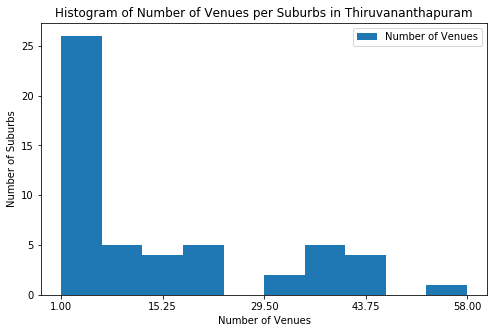

In [30]:
TVM_Count.plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Number of Venues per Suburbs in Thiruvananthapuram') # add a title to the histogram
plt.ylabel('Number of Suburbs') # add y-label
plt.xlabel('Number of Venues') # add x-label

plt.show()

In [31]:
# add new labels based on number of venues

TVM_Count['Category'] = [1 if x <= 10 else 2 if x <= 30 else 3 for x in TVM_Count['Number of Venues']] 

TVM_Count

,Number of Venues,Category
Neighborhood,,
Thampanoor,58,3
Connemara Market,46,3
Palayam,43,3
Chala,43,3
East Fort,42,3
Pangappara,39,3
Thumba,39,3
Thonnakkal,39,3
Vazhuthacaud,39,3


In [32]:


TVM_merged1 = pd.merge(TVM_Count, TVM_merged, left_on = 'Neighborhood', right_on = 'Neighborhood', how='left')

In [33]:
TVM_merged1.head(5)

,Neighborhood,Number of Venues,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
0,Thampanoor,58,3,1,Indian Restaurant,Hotel,Clothing Store,Multiplex,Asian Restaurant,8.548949,76.917187
1,Connemara Market,46,3,1,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,Bakery,History Museum,8.502869,76.951233
2,Palayam,43,3,1,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,History Museum,Restaurant,8.453062,77.059209
3,Chala,43,3,1,Indian Restaurant,Vegetarian / Vegan Restaurant,Multiplex,Shopping Mall,Clothing Store,8.482888,76.949420
4,East Fort,42,3,1,Indian Restaurant,Vegetarian / Vegan Restaurant,Multiplex,Shopping Mall,Clothing Store,8.482810,76.947675


In [34]:
# To remove unnecessary columns in TVM_merged1

TVM_Map = TVM_merged1.drop(['Number of Venues','Cluster Labels'], axis=1)

TVM_Map.head(5)

,Neighborhood,Category,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Latitude,Longitude
0,Thampanoor,3,Indian Restaurant,Hotel,Clothing Store,Multiplex,Asian Restaurant,8.548949,76.917187
1,Connemara Market,3,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,Bakery,History Museum,8.502869,76.951233
2,Palayam,3,Hotel,Indian Restaurant,Vegetarian / Vegan Restaurant,History Museum,Restaurant,8.453062,77.059209
3,Chala,3,Indian Restaurant,Vegetarian / Vegan Restaurant,Multiplex,Shopping Mall,Clothing Store,8.482888,76.949420
4,East Fort,3,Indian Restaurant,Vegetarian / Vegan Restaurant,Multiplex,Shopping Mall,Clothing Store,8.482810,76.947675


[29 12 11]
[1.         1.66666667 2.33333333 3.        ]


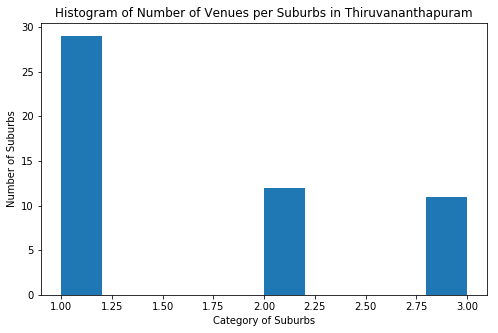

In [35]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(TVM_Map['Category'],3)

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

TVM_Map['Category'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Number of Venues per Suburbs in Thiruvananthapuram') # add a title to the histogram
plt.ylabel('Number of Suburbs') # add y-label
plt.xlabel('Category of Suburbs') # add x-label

plt.show()

In [36]:
# create map

Latitude = 8.516299	
Longitude = 76.892079
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)



# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(TVM_Map['Latitude'], TVM_Map['Longitude'], TVM_Map['Neighborhood'], TVM_Map['Category']):
    label = folium.Popup(str(poi) + ' Category ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters